this script plot the type of fund provided by countries and the type of fund recieved by countries

In [9]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
import ternary
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import geopandas as gp
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
fund_type_path="../../data/nf_folder/Data/DerivedData/Derived/fund_type/fund_type.csv"
recv_type_path="../../data/nf_folder/Data/DerivedData/Derived/fund_type/recv_type.csv"
cntry_cnt_path="../../data/nf_folder/Data/DerivedData/Derived/cntry_year_cnt.csv"

In [3]:
fund_type_df=pd.read_csv(fund_type_path)
recv_type_df=pd.read_csv(recv_type_path)
cntry_cnt_df=pd.read_csv(cntry_cnt_path)

In [4]:
fund_type_df.head()

,cntry,coll,dome,fore
0,Afghanistan,0.306918,0.00000,0.693082
1,Albania,0.556507,0.10274,0.340753
2,Algeria,0.520118,0.43016,0.049722
3,Andorra,0.194070,0.00000,0.805930
4,Angola,0.738710,0.00000,0.261290


In [5]:
recv_type_df.head()

,cntry,coll,dome,fore,not-funded
0,Afghanistan,0.000000,0.002975,0.385776,0.611249
1,Albania,0.003129,0.007927,0.153920,0.835023
2,Algeria,0.015532,0.067781,0.086895,0.829792
3,Andorra,0.034355,0.085887,0.395432,0.484326
4,Angola,0.071026,0.009717,0.449565,0.469692


In [7]:
cntry_cnt_df.head()

,country,year,count
0,Afghanistan,2009,8.750000
1,Afghanistan,2010,15.566667
2,Afghanistan,2011,13.044444
3,Afghanistan,2012,19.566667
4,Afghanistan,2013,11.095833


In [7]:
n=20
topnlist=cntry_cnt_df.groupby(['country'])['count'].sum().sort_values(ascending=False)[:n].index
topnlist

Index(['United States', 'China', 'Japan', 'Germany', 'United Kingdom', 'India',
       'France', 'South Korea', 'Italy', 'Canada', 'Spain', 'Brazil',
       'Australia', 'Russia', 'Iran', 'Turkey', 'Taiwan', 'Netherlands',
       'Poland', 'Switzerland'],
      dtype='object', name='country')

In [8]:
def select_topn(data, topnlist):
    data=data.set_index('cntry')
    data_select=data.loc[list(topnlist),:]
    data_select=data_select.sort_values(by='dome',ascending=False)
    return data_select

In [9]:
fund_sub=select_topn(fund_type_df,topnlist)
recv_sub=select_topn(recv_type_df,topnlist)

In [10]:
recv_sub.head()

,coll,dome,fore,not-funded
cntry,,,,
China,0.040685,0.759112,0.021537,0.178666
South Korea,0.044598,0.618697,0.035827,0.300878
Taiwan,0.061496,0.586579,0.045424,0.306501
Brazil,0.058591,0.511313,0.032883,0.397212
United States,0.081362,0.484371,0.068549,0.365718


In [39]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba7f94fb80>,
      dtype=object)

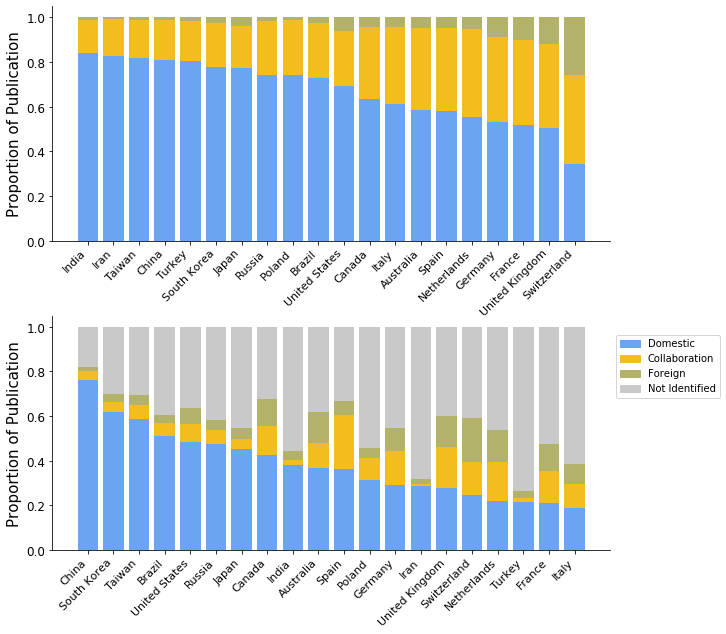

In [75]:
fig, ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
plt.subplots_adjust(hspace=0.32)
dome=fund_sub['dome'].values
coll=fund_sub['coll'].values
fore=fund_sub['fore'].values
labels=fund_sub.index
ax[0].bar(labels,dome,label='Domestic',color='#6BA5F2')
ax[0].bar(labels,coll, bottom=dome,label='Collaboration',color='#F2BD1D')
ax[0].bar(labels,fore, bottom=dome+coll,label='Foreign',color='#B2B26B')
ax[0].set_xticklabels(labels=labels,rotation=45,horizontalalignment='right',
              fontsize=11)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_yticklabels(labels=np.arange(0,11,2)/10,fontsize=12)
ax[0].set_ylabel("Proportion of Publication",fontsize=15)


dome=recv_sub['dome'].values
coll=recv_sub['coll'].values
fore=recv_sub['fore'].values
notid=recv_sub['not-funded'].values
labels=recv_sub.index
ax[1].bar(labels,dome,label='Domestic',color='#6BA5F2')
ax[1].bar(labels,coll, bottom=dome,label='Collaboration',color='#F2BD1D')
ax[1].bar(labels,fore, bottom=dome+coll,label='Foreign',color='#B2B26B')
ax[1].bar(labels,notid, bottom=dome+coll+fore,label='Not-Identified',color='#C9C9C9')
ax[1].set_xticklabels(labels=labels,rotation=45,horizontalalignment='right',
              fontsize=11)
ax[1].set_yticklabels(labels=np.arange(0,11,2)/10,fontsize=12)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_ylabel("Proportion of Publication",fontsize=15)

legend_elements = [Patch(facecolor='#6BA5F2', edgecolor='#6BA5F2',label='Domestic'),
                   Patch(facecolor='#F2BD1D', edgecolor='#F2BD1D',label='Collaboration'),
                   Patch(facecolor='#B2B26B', edgecolor='#B2B26B',label='Foreign'),
                   Patch(facecolor='#C9C9C9', edgecolor='#C9C9C9',label='Not Identified')]
plt.legend(handles=legend_elements, loc=(1.01,0.65))
plt.savefig("../../data/nf_folder/Figs/fund_type.pdf",bbox_inches='tight')

In [41]:
cntry_meta=pd.read_csv("../../data/nf_folder/Data/AdditionalData/country_metadata.csv")
cntry_meta=cntry_meta[['country','continent']]
cntry_meta=cntry_meta.dropna()
cntry_meta.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,American-Samoa,Oceania
4,Andorra,Europe


In [48]:
fund_type_df=fund_type_df.merge(cntry_meta,left_on='cntry',right_on='country',how='inner')
fund_type_df.head()

,cntry,coll,dome,fore,country,continent
0,Afghanistan,0.306918,0.00000,0.693082,Afghanistan,Asia
1,Albania,0.556507,0.10274,0.340753,Albania,Europe
2,Algeria,0.520118,0.43016,0.049722,Algeria,Africa
3,Andorra,0.194070,0.00000,0.805930,Andorra,Europe
4,Angola,0.738710,0.00000,0.261290,Angola,Africa


In [61]:
colordict={'North America':'#3F63A6','South America':'#F2CB02','Oceania':'#F29F05',
           'Europe':'#A64208','Africa':'#32A836','Asia':'#FF4D00'}

In [63]:
fund_type_df.head()

,cntry,coll,dome,fore,country,continent,color
0,Afghanistan,0.306918,0.00000,0.693082,Afghanistan,Asia,Asia
1,Albania,0.556507,0.10274,0.340753,Albania,Europe,Europe
2,Algeria,0.520118,0.43016,0.049722,Algeria,Africa,Africa
3,Andorra,0.194070,0.00000,0.805930,Andorra,Europe,Europe
4,Angola,0.738710,0.00000,0.261290,Angola,Africa,Africa


In [71]:
fund_type_df.sort_values(by='fore')

,cntry,coll,dome,fore,country,continent,color
157,Tajikistan,1.000000,0.000000,0.000000,Tajikistan,Asia,Asia
86,Kyrgyzstan,1.000000,0.000000,0.000000,Kyrgyzstan,Asia,Asia
62,Grenada,0.600000,0.400000,0.000000,Grenada,North America,North America
45,Dominican Republic,0.785714,0.214286,0.000000,Dominican Republic,North America,North America
114,Nicaragua,1.000000,0.000000,0.000000,Nicaragua,North America,North America
...,...,...,...,...,...,...,...
115,Niger,0.108463,0.000000,0.891537,Niger,Africa,Africa
98,Maldives,0.000000,0.000000,1.000000,Maldives,Asia,Asia
135,Samoa,0.000000,0.000000,1.000000,Samoa,Oceania,Oceania
37,Cook Islands,0.000000,0.000000,1.000000,Cook Islands,Oceania,Oceania


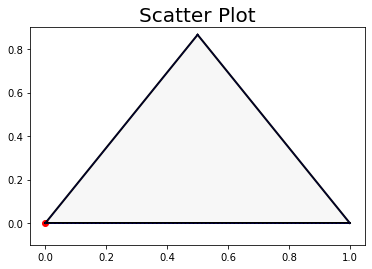

In [73]:
scale = 1
figure, tax = ternary.figure(scale=scale)
tax.set_title("Scatter Plot", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="blue")
# Plot a few different styles with a legend
tax.scatter([[0,0,1]], color='red')

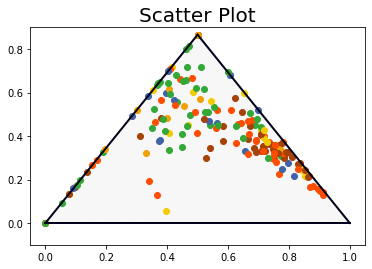

In [69]:
scale = 1
figure, tax = ternary.figure(scale=scale)
tax.set_title("Scatter Plot", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="blue")
# Plot a few different styles with a legend
for index, row in fund_type_df.iterrows():
    x=row['dome']
    y=row['coll']
    z=row['fore']
    cont=row['continent']
    c=colordict[cont]
    tax.scatter([[x,y,z]], color=c)
#tax.scatter(a, color='red')


In [4]:
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [8]:
def plot_worldmap(ax, fig, basemap, data, plotcolumn, cmap, vmin, vmax,legend_title):
    """plot a basemap and color the country based on the column passed into
    """

    basemap.plot(ax=ax, linewidth=0.25, edgecolor="#8C8C8C", facecolor="#ffffff")
    data.plot(column=plotcolumn, cmap=cmap, vmin=vmin, vmax=vmax, ax=ax)
    ax.axis("off")
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    clb = fig.colorbar(sm, cax=cax)
    clb.ax.set_title(legend_title)
    return fig, ax

In [10]:
world_geo=gp.read_file("../../data/nf_folder/Data/AdditionalData/world_map_shp/ne_50m_admin_0_countries.shp")
world_geo=world_geo[['WoS','Code','geometry']]
world_geo=world_geo[world_geo.WoS!='Antarctica']
world_geo.head()

,WoS,Code,geometry
0,Zimbabwe,ZWE,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,ZMB,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,YEM,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,VNM,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,VEN,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [12]:
fund_type_df.sort_values(by='dome')

,cntry,coll,dome,fore
0,Afghanistan,0.306918,0.000000,0.693082
146,San Marino,0.272727,0.000000,0.727273
145,Samoa,0.000000,0.000000,1.000000
33,Chad,1.000000,0.000000,0.000000
38,Cook Islands,0.000000,0.000000,1.000000
...,...,...,...,...
176,Turkey,0.179925,0.804199,0.015875
35,China,0.179338,0.808224,0.012437
168,Taiwan,0.168088,0.819720,0.012192
78,Iran,0.163063,0.829171,0.007767


In [ ]:
plot_data=world_geo.merge(fund_type_df,left_on='WoS',right_on='cntry')
plot_data=gp.GeoDataFrame(plot_data)
fig, ax=plt.subplots(figsize=(10,6))
fig, ax = plot_worldmap(ax, fig, world_geo, plot_data, 'dome','viridis',0.0,0.8,'Ratio')